In [1]:
import yfinance as yf
import pandas as pd
import quiverquant as qq

In [2]:
token = 'ae7272b6f0ef826789d145ccba3004b2e2e00720'
qq = qq.quiver(token)

In [5]:
df = qq.insiders()

Drawing from:  https://api.quiverquant.com/beta/live/insiders


In [35]:
df.tail()

,Ticker,Date,Name,AcquiredDisposedCode,TransactionCode,Shares,PricePerShare,SharesOwnedFollowing,fileDate
19995,CSTL,2023-09-01T00:00:00.000,MAETZOLD DEREK J,D,S,81.0,20.052,16653.0,2023-09-06T20:40:40.000
19996,CSTL,2023-09-01T00:00:00.000,MAETZOLD DEREK J,D,S,718.0,20.052,115103.0,2023-09-06T20:40:40.000
19997,CSTL,2023-09-01T00:00:00.000,MAETZOLD DEREK J,D,S,226.0,20.052,94748.0,2023-09-06T20:40:40.000
19998,AZPN,2023-09-01T00:00:00.000,BEAUCHAMP ROBERT E,A,A,1207.0,0.000,1934.0,2023-09-06T20:40:32.000
19999,SLDB,2023-09-02T00:00:00.000,Ganot Ilan,A,M,1583.0,NaN,89341.0,2023-09-06T20:40:30.000


In [40]:
dfg = df.drop(['fileDate', 'SharesOwnedFollowing'], axis=1)
group_cols = dfg.columns[dfg.columns != 'Shares'].tolist()
dfs = dfg.groupby(group_cols)['Shares'].sum().reset_index()
#dff = dfg.groupby(group_cols).size().to_frame('Transactions')
#dfm = pd.merge(dfs, dff, left_index=True, right_index=True).reset_index()
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15809 entries, 0 to 15808
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ticker                15809 non-null  object 
 1   Date                  15809 non-null  object 
 2   Name                  15809 non-null  object 
 3   AcquiredDisposedCode  15809 non-null  object 
 4   TransactionCode       15809 non-null  object 
 5   PricePerShare         15809 non-null  float64
 6   Shares                15809 non-null  float64
dtypes: float64(2), object(5)
memory usage: 864.7+ KB


In [42]:
dfs.head()

,Ticker,Date,Name,AcquiredDisposedCode,TransactionCode,PricePerShare,Shares
0,(SIRI),2023-09-18T00:00:00.000,BARRY THOMAS D,D,F,3.99,35755.000
1,1314152,2023-09-25T00:00:00.000,Day R. Martel,A,J,13.14,358.694
2,1314152,2023-09-25T00:00:00.000,FISCHER TAMARA D,A,J,13.14,56.483
3,1314152,2023-09-25T00:00:00.000,Gordon Jacques,A,J,13.14,30.186
4,1314152,2023-09-25T00:00:00.000,LINDGREN DOUGLAS A,A,J,13.14,107.529


In [48]:
alist = []

for index, row in dfs.iterrows():
    
    try:
        startdate = pd.Timestamp(str(row[1]).split('T')[0])
        startprice = yf.download(row[0], start = startdate, end = startdate + pd.Timedelta(days=1))
        endprice = yf.download(row[0], start = '2023-10-12', end = '2023-10-13')
        
        startprice = float(startprice['Close'])
        endprice = float(endprice['Close'])
        
        pct_change = ((endprice - startprice) / startprice) * 100
        
        alist.append(pct_change)

        
    except:
        alist.append(None)
        
dfs['movement_since_trade'] = alist

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['(SIRI)']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['(SIRI)']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1314152']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1314152']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1314152']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1314152']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1314152']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1314152']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1314152']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1314152']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1314152']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1314152']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1314152']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1314152']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1314152']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['1314152']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AAN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AAN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AAPL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AAPL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AAPL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AAPL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AAPL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ABR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ACEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ACEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ACEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ACEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ACEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ACMR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ACMR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ACRG.A.U']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ACRG.A.U']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ADER']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADER']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADMA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADMA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ADNT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ADSK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ADV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AEO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AEO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AEO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AEO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AEO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AEYE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AEYE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AEYE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AEYE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AFRM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AFRM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AFRM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AFRM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AFRM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AFRM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AFRM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AFRM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AGM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AGM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AGM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AGTI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AIP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AIP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AIP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AIP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AIT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AKAM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKAM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ALEC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALEC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALEC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALEC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALGT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALGT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALGT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ALL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ALTO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALTO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AMAT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AMPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AMRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ASLE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-03-18 00:00:00 -> 2023-03-19 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ASPS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASPS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASPS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASPS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASPS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASPS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASPS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASPS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ASRT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASRT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ATLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ATNF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ATNF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ATNF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ATNF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AVID']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AVID']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AVID']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AVID']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AVID']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AVPT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['AZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BAND']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BBAI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBAI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBAI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BBSI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Failed to get ticker 'BBXIA/B' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBXIA/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'BBXIA/B' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBXIA/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'BBXIA/B' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBXIA/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'BBXIA/B' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBXIA/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'BBXIA/B' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBXIA/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'BBXIA/B' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBXIA/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'BBXIA/B' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBXIA/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'BBXIA/B' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBXIA/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'BBXIA/B' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBXIA/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'BBXIA/B' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBXIA/B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BCAB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BCAB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BCAB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BCAB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BCAB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BCAB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BCAB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BCAL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-25 00:00:00 -> 2023-06-26 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BCO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BCO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BFRGW']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['BFRGW']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BGXX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BIGC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BJRI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-05 00:00:00 -> 2023-09-06 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-05 00:00:00 -> 2023-09-06 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-05 00:00:00 -> 2023-09-06 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-05 00:00:00 -> 2023-09-06 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-05 00:00:00 -> 2023-09-06 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-05 00:00:00 -> 2023-09-06 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-05 00:00:00 -> 2023-09-06 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-05 00:00:00 -> 2023-09-06 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-05 00:00:00 -> 2023-09-06 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BKSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BLGO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BLL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BLL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BLL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BLL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BNED']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BNED']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BNED']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BNED']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:


['BRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BRID']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BRLT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRLT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRLT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRLT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRLT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BROS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BROS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BROS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BROS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BROS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BROS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['C']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['C']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['C']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['C']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['C']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CABO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CACI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CACI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CACI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CACI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CACI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CACI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CACI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CAG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CAG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CAL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CARS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CART']: Exception("%ticker%: Data doesn't exist for startDate = 1695009600, endDate = 1695096000")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CART']: Exception("%ticker%: Data doesn't exist for startDate = 1695009600, endDate = 1695096000")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CART']: Exception("%ticker%: Data doesn't exist for startDate = 1695009600, endDate = 1695096000")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CART']: Exception("%ticker%: Data doesn't exist for startDate = 1695009600, endDate = 1695096000")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CART']: Exception("%ticker%: Data doesn't exist for startDate = 1695009600, endDate = 1695096000")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CART']: Exception("%ticker%: Data doesn't exist for startDate = 1695009600, endDate = 1695096000")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CART']: Exception("%ticker%: Data doesn't exist for startDate = 1695009600, endDate = 1695096000")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CART']: Exception("%ticker%: Data doesn't exist for startDate = 1695009600, endDate = 1695096000")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CART']: Exception("%ticker%: Data doesn't exist for startDate = 1695009600, endDate = 1695096000")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CART']: Exception("%ticker%: Data doesn't exist for startDate = 1695009600, endDate = 1695096000")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CART']: Exception("%ticker%: Data doesn't exist for startDate = 1695009600, endDate = 1695096000")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CART']: Exception("%ticker%: Data doesn't exist for startDate = 1695009600, endDate = 1695096000")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CART']: Exception("%ticker%: Data doesn't exist for startDate = 1695009600, endDate = 1695096000")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CASH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CASH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CASH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CASH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CBRL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBRL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBRL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBRL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBRL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBRL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBRL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBRL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CBU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CCHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CCOI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCOI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCOI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCOI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCOI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCOI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCOI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCOI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CDIO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CDIO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CDIO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CDIO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CEG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CEG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CEG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CEG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CEG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CEG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CEG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CEG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CELL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CHS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CLB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CLSK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLSK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLSK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLSK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CMCSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CMCSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CMCSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CMCSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CMP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CMP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CMP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CMP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CMP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CMP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CMP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CNC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNDT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNDT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CNTA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNTA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNTA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNTA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNTA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CNXC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNXC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNXC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNXC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['COFS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COFS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COFS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COFS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COFS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COFS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COFS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COFS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['COMM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['COTY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COTY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COTY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['CPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


2 Failed downloads:
['CRDB', 'CRDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-06 00:00:00 -> 2023-09-07 00:00:00)')



[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['CRDA', 'CRDB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CROX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CSCO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CSCO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CSCO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CSGP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CSGS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CTLT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CVNA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CVNA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CVNA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CVNA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CVNA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CVNA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CVNA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CVNA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CWT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-03 00:00:00 -> 2023-09-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CXM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['DCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['DH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['DIS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DIS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DIS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['DIS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DIS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DIS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DKL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DKL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DKL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DKL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DKNG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['DOCN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DOCN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DOCN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['DRQ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DRQ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DRQ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DRQ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DRQ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DRQ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['DSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['DTOC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-25 00:00:00 -> 2023-09-26 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DTOC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DTST']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DTST']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DTST']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DTST']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DTST']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['DUOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DUOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['DXLG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DXLG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ECL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['EHTH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EHTH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ELEV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ENPH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['EPAC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ESMT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESMT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESMT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESMT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESMT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESMT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ESSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESTA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ESTE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESTE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESTE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESTE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESTE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ETNB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ETNB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ETNB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ETSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ETSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['EVH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['EXC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EXC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EXC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EXC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EXC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EXC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EXC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EXC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['EXPE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FBP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:


['FCX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FCX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FFBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FFBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FFBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FFBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FFBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FLAG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FLT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-22 00:00:00 -> 2023-04-23 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FMNB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FOMC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FORR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FORR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FRSH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRSH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRSH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRSH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRSH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRSH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRSH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRSH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FSLR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSLR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSLR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSLR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSLR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSLR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSLR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSLR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSLR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSLR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSLR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['FTNT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FTNT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FTNT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FTNT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FTNT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FTNT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['GBLI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GBLI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GBLI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GCI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['GDOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['GEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['GGG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GGZ.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GGZ.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['GILD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GILD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GILD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GILD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GILD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['GLU.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GLU.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GLU.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GLU.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GLU.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GLU.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GLU.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GLU.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

Failed to get ticker 'GTII/GTBIF' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GTII/GTBIF']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'GTII/GTBIF' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GTII/GTBIF']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'GTII/GTBIF' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GTII/GTBIF']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'GTII/GTBIF' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GTII/GTBIF']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['GVA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GVP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['GWW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GWW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GWW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['HARP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HARP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HARP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HBIA.PK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HBIA.PK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HBIA.PK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HBIA.PK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['HCSG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HCSG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['HD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['HEI.A']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['HEI.A']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['HEI.A']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['HEI.A']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['HEI.A']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['HEI.A']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['HIBB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['HLIO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HLIO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HLIO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HLIO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HLIO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HLIO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HLIO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['HLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['HOG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HOG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['HOOD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['HRL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HRL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HRL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HRL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HRL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HRL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['HSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['HTZ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HTZ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['HXL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['HYLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HYZN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-02 00:00:00 -> 2023-09-03 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HYZN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-02 00:00:00 -> 2023-09-03 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HZO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IAC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IBCP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['IIMWX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IIMWX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IIMWX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IIMWX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['IMMR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IMMR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IMMR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['INGR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INGR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['IP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 00:00:00 -> 2023-01-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 00:00:00 -> 2023-01-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 00:00:00 -> 2023-01-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 00:00:00 -> 2023-01-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 00:00:00 -> 2023-01-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 00:00:00 -> 2023-01-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 00:00:00 -> 2023-01-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 00:00:00 -> 2023-01-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 00:00:00 -> 2023-01-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 00:00:00 -> 2023-01-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 00:00:00 -> 2023-01-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['IRBT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['IRON']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ITCI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ITCI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['IZEA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IZEA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IZEA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IZEA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IZEA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IZEA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IZEA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IZEA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IZEA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IZEA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IZEA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['JBL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JCI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['JNPR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JNPR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['JOBY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JOBY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JOBY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JOBY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JOBY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JOBY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JOBY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['JPM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JPM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['JPM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JPM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JPM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JPM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JPM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Failed to get ticker 'JUSH/JUSHF' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JUSH/JUSHF']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'JUSH/JUSHF' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JUSH/JUSHF']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'JUSH/JUSHF' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JUSH/JUSHF']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'JUSH/JUSHF' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JUSH/JUSHF']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JWN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JWN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JXN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['KD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['KLIC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KLIC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KLIC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KLIC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KLIC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KLIC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KLIC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['KNSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-15 00:00:00 -> 2023-07-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KNSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-15 00:00:00 -> 2023-07-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KNSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-02 00:00:00 -> 2023-09-03 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KNSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-02 00:00:00 -> 2023-09-03 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KNSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-02 00:00:00 -> 2023-09-03 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KNSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-02 00:00:00 -> 2023-09-03 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KNSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-02 00:00:00 -> 2023-09-03 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KNSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-02 00:00:00 -> 2023-09-03 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['KORE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KORE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KORE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KORE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KORE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KORE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['KRMD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['LAW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['LBTY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LBTY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LBTY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LBTY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LBTY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LBTY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LBTY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LBTY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LBTY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LBTY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LBTY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LBTY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LBTY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LBTY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LCID']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LCID']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LCID']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LCID']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LCID']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LCID']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LCID']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LCID']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['LDI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LDI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['LEA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['LEN.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-22 00:00:00 -> 2023-09-23 00:00:00)')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['LEN.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['LEN.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-13 00:00:00 -> 2023-10-14 00:00:00)')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['LEN.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['LFVN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LFVN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LFVN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LFVN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LFVN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LFVN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LFVN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LFVN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LFVN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['LIDR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LIDR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LIDR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LILA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LILA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LILA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['LIND']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LIND']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['LNG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['LNW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LNW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['LOW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['LPRO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LPRO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['LUXH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LVLU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LVLU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LVLU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['LYB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['M6697']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['M6697']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['MAPS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAPS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAPS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAPS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAPS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['MATV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MATV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MATV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['MGM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MGM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['MKFG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MKFG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['MMP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MMP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['MNK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['MNPR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MNPR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MNPR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'MOGA/MOGB' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOGA/MOGB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['MOS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['MSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['MTCH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTCH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['N']: Exception('%ticker%: %ticker%o price data found, symbol may be delisted (1d 2023-09-18 00:00:00 -> 2023-09-19 00:00:00)')



[*********************100%%**********************]  2 of 3 completed



1 Failed download:
['N']: Exception('%ticker%: %ticker%o price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')


[*********************100%%**********************]  3 of 3 completed


1 Failed download:
['N']: Exception('%ticker%: %ticker%o price data found, symbol may be delisted (1d 2023-10-09 00:00:00 -> 2023-10-10 00:00:00)')



[*********************100%%**********************]  3 of 3 completed


1 Failed download:
['N']: Exception('%ticker%: %ticker%o price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  3 of 3 completed


1 Failed download:
['N']: Exception('%ticker%: %ticker%o price data found, symbol may be delisted (1d 2023-10-09 00:00:00 -> 2023-10-10 00:00:00)')



[*********************100%%**********************]  3 of 3 completed


1 Failed download:
['N']: Exception('%ticker%: %ticker%o price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'N/A' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['N/A']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NARI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-01 00:00:00 -> 2023-04-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NARI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-01 00:00:00 -> 2023-07-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NARI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NARI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NARI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NARI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:DHC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:DHC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:DHC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:DHC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:OPI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:OPI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:OPI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:OPI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:OPI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:OPI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:RMR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:RMR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:RMR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:RMR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:RMR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:RMR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:SVC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:SVC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:SVC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NASDAQ:SVC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NAVI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NBHC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NBHC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NEO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NGLD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NJR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NJR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NJR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NJR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NJR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NJR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NJR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NJR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NJR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NKGN']: Exception("%ticker%: Data doesn't exist for startDate = 1695960000, endDate = 1696046400")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NMIH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NMTC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NMTC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NMTC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NOC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NOC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NOC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NRG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-03 00:00:00 -> 2023-09-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NRG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-03 00:00:00 -> 2023-09-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NRG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-03 00:00:00 -> 2023-09-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NRG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-03 00:00:00 -> 2023-09-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NRG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-03 00:00:00 -> 2023-09-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NRG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-03 00:00:00 -> 2023-09-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NTRS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NTRS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NTRS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NTRS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NTRS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NTRS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NTRS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NTRS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NTRS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NTRS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NUVB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-02-19 00:00:00 -> 2023-02-20 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NUVB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-02-20 00:00:00 -> 2023-02-21 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NVAX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NVAX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NVRI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NVRI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NVRO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-03 00:00:00 -> 2023-09-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NVRO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NVRO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NVRO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NVST']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NVST']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NVST']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NVST']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NVTA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

Failed to get ticker 'NYSE/TRN' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NYSE/TRN']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'NYSE/TRN' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NYSE/TRN']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker 'NYSE/TRN' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NYSE/TRN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Failed to get ticker 'NYSE/TRN' reason: Expecting value: line 1 column 1 (char 0)



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NYSE/TRN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:


['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed



1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  2 of 2 completed


1 Failed download:
['NYSE:']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NYSE:NYCB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NYSE:NYCB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NONE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NONE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NONE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NONE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NONE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NONE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NONE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NONE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NONE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NONE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['OCGN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['OIS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['OMC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OMC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OMC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OMC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['OPAD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OPAD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OPAD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OPAD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['OPRT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OPRT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OPRT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OPRT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OPRT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OPRT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OPRT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OPRT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OPRT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ORGN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ORGN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ORGN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OSBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OSBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OSBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OSBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OSBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['OWLT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


2 Failed downloads:
['PARA', 'PARAA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['PARAA', 'PARA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['PARA', 'PARAA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PATH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PATH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PATH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PATH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PATH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PATH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PBPB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PCTI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PCTI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PCTI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PCTI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PCTI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PCTI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PDCO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PDM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PFGC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-02 00:00:00 -> 2023-09-03 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PHIO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PIAI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PLMR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-15 00:00:00 -> 2023-07-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PLMR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-15 00:00:00 -> 2023-07-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PLTK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PNBK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-07 00:00:00 -> 2023-04-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PNBK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-07 00:00:00 -> 2023-04-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PNBK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-07 00:00:00 -> 2023-04-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PNR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PPG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PPG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PPG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PPG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PRCH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRCH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PRGS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRGS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRGS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRGS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRGS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRGS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PRI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PRTFTM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRTFTM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRTH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRTH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRTK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PUBM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PUBM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PUBM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PUBM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PUBM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PUBM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PUBM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PUBM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PUBM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PUBM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PVH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PVH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PVH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PVH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PVH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PWFL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PYCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['QCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QCOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['QLYS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['QTRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QTRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['QUOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QUOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QUOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QUOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QUOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QUOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QUOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QUOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QUOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QUOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QUOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QUOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['RADI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RADI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RADI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RADI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RADI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RADI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RAMP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-14 00:00:00 -> 2023-10-15 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['RCKY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RCKY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RCKY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RCKY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RCKY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RCKY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RCKY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RCKY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RCKY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['REAL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['REI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RELI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 00:00:00 -> 2023-01-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['REPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RETA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RETA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['RFL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['RJF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['RMAX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['RPAY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-03 00:00:00 -> 2023-09-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['RUM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['RWT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SAIC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SBSI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBUX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SCTL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SDIG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-11-20 00:00:00 -> 2022-11-21 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SDIG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-11-20 00:00:00 -> 2022-11-21 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SEAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SEAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SEAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SEAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SEAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SEAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SEAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SEAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SEAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SEAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SKIL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SKIL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SKIL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SKIL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SKYX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SKYX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SKYX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SMRT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SMRT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SMTC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SMTC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SNCE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SNCE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SPLK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPLK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPLK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPLK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SPLP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPLP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SPRU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPRU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPRU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPRU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SPWH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SPWH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-14 00:00:00 -> 2023-10-15 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SRGA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SRGA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['STBA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STBA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STCN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STCN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STCN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['STEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['STRUX']: Exception("%ticker%: Data doesn't exist for startDate = 1694404800, endDate = 1694491200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SUNL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SWBI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['SYF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['SYK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 00:00:00 -> 2023-09-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['T']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['T']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['T']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['T']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['T']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['TBLA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TBLA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['THO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['THR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THRM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THRM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['TIPWX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TIPWX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['TRSSF']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRSSF']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRUE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRUP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRUP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRUP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRUP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRUP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRUP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRUP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRUP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['TTD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['UBER']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UBER']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UBER']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UBER']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UBER']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UBI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-11 00:00:00 -> 2023-09-12 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UBI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UBSI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UBSI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['UNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['UNP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-10 00:00:00 -> 2023-09-11 00:00:00)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


1 Failed download:
['UPLD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UPLD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UPLD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UPLD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UPLD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UPLD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UPLD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['UPTD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-12 -> 2023-10-13)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['URI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-01 00:00:00 -> 2023-07-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-01 00:00:00 -> 2023-07-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-01 00:00:00 -> 2023-07-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-01 00:00:00 -> 2023-07-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-01 00:00:00 -> 2023-07-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VBTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['VEEV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VEEV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VEEV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VEEV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VEEV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VEEV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VEEV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VEEV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VEEV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['VEEV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



1 Failed download:
['VEEV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VEEV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VEEV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 00:00:00 -> 2023-10-16 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['VIEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['VIEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VIEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VIEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['VIEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VIEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VIEW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1696046400, endDate = 1696132800")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1696219200, endDate = 1696305600")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VMEO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VMW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VMW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VMW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VMW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['VPLM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-23 00:00:00 -> 2023-09-24 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['VRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 00:00:00 -> 2023-09-18 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['VRSK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VRSK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VRSK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['VRTV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['VSTS']: Exception("%ticker%: Data doesn't exist for startDate = 1696219200, endDate = 1696305600")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VSTS']: Exception("%ticker%: Data doesn't exist for startDate = 1696219200, endDate = 1696305600")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VSTS']: Exception("%ticker%: Data doesn't exist for startDate = 1696219200, endDate = 1696305600")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VSTS']: Exception("%ticker%: Data doesn't exist for startDate = 1696219200, endDate = 1696305600")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VSTS']: Exception("%ticker%: Data doesn't exist for startDate = 1696219200, endDate = 1696305600")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VSTS']: Exception("%ticker%: Data doesn't exist for startDate = 1696219200, endDate = 1696305600")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VSTS']: Exception("%ticker%: Data doesn't exist for startDate = 1696219200, endDate = 1696305600")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VSTS']: Exception("%ticker%: Data doesn't exist for startDate = 1696219200, endDate = 1696305600")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['VYGR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['W']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['W']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['W']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['W']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['WDC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-03 00:00:00 -> 2023-09-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WDC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-03 00:00:00 -> 2023-09-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WDC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-03 00:00:00 -> 2023-09-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WDC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-03 00:00:00 -> 2023-09-04 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WDC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WDC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WDC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WDC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WDC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['WFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['WGS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WGS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-16 00:00:00 -> 2023-09-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['WKHS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['WMT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WMT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WMT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['WTFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WTFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WTFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WTFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WTFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WTFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WTFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WTFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WTFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WTFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['WU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-07 00:00:00 -> 2023-10-08 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['XOS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-08-20 00:00:00 -> 2023-08-21 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['YELP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['YUM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ZETA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZETA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZETA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZETA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ZI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 00:00:00 -> 2023-10-02 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ZM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 00:00:00 -> 2023-09-05 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 00:00:00 -> 2023-09-10 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ZM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 00:00:00 -> 2023-10-09 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['ZTS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZUO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZUO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZUO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZUO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['NONE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NONE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [51]:
dfs.to_csv('insider_movemnts.csv')

In [52]:
df_dropna = dfs.dropna()
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14275 entries, 8 to 15808
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ticker                14275 non-null  object 
 1   Date                  14275 non-null  object 
 2   Name                  14275 non-null  object 
 3   AcquiredDisposedCode  14275 non-null  object 
 4   TransactionCode       14275 non-null  object 
 5   PricePerShare         14275 non-null  float64
 6   Shares                14275 non-null  float64
 7   movement_since_trade  14275 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1003.7+ KB


In [93]:
df_model = df_dropna.drop(['Name'], axis=1)
df_model['Date'] = pd.to_datetime(df['Date'])
#pd.to_datetime(df['Date'].astype(str).str.split('T')
df_model['Date'] = (pd.to_datetime('2023-10-13') - df_model['Date']).dt.days
df_model.head(10)
#pd.Timestamp(str(row[1]).split('T')[0])

,Ticker,Date,AcquiredDisposedCode,TransactionCode,PricePerShare,Shares,movement_since_trade
8,A,-2,A,A,113.1000,2203.00,-3.678157
9,A,-2,A,P,111.0900,2.59,-2.732141
10,AA,-2,A,A,0.0000,5550.00,-6.759101
11,AA,-2,A,A,27.1600,2577.00,-0.957291
12,AADI,-2,D,S,5.9668,13889.00,-28.327650
13,AADI,-2,D,S,5.6341,21000.00,-23.497268
14,AADI,-2,D,S,5.2928,7111.00,-21.052638
15,AADI,-2,D,S,4.3685,25569.00,-2.325590
16,AADI,-2,D,S,4.0961,16431.00,4.477608
17,AAL,-2,A,A,0.0000,1493107.00,-7.656968


In [57]:
from sklearn.preprocessing import OneHotEncoder

In [94]:
one_hot = OneHotEncoder(sparse=False)
encoded_sources = one_hot.fit_transform(df_model[['TransactionCode']])
encoded_df = pd.DataFrame(encoded_sources, columns=one_hot.get_feature_names_out(['TransactionCode']))
df_model = pd.concat([df_model, encoded_df], axis=1)
encoded_sources = one_hot.fit_transform(df_model[['AcquiredDisposedCode']])
encoded_df = pd.DataFrame(encoded_sources, columns=one_hot.get_feature_names_out(['AcquiredDisposedCode']))
df_model = pd.concat([df_model, encoded_df], axis=1)
df_model.head()

,Ticker,Date,AcquiredDisposedCode,TransactionCode,PricePerShare,Shares,movement_since_trade,TransactionCode_A,TransactionCode_C,TransactionCode_D,...,TransactionCode_L,TransactionCode_M,TransactionCode_O,TransactionCode_P,TransactionCode_S,TransactionCode_W,TransactionCode_X,AcquiredDisposedCode_A,AcquiredDisposedCode_D,AcquiredDisposedCode_nan
8,A,-2.0,A,A,113.1000,2203.00,-3.678157,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,A,-2.0,A,P,111.0900,2.59,-2.732141,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,AA,-2.0,A,A,0.0000,5550.00,-6.759101,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11,AA,-2.0,A,A,27.1600,2577.00,-0.957291,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12,AADI,-2.0,D,S,5.9668,13889.00,-28.327650,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
df_model = df_model.drop(['TransactionCode', 'AcquiredDisposedCode'], axis=1)
df_model = df_model.drop(['AcquiredDisposedCode_nan'], axis=1)

In [96]:
df_model = df_model.dropna()
df_model.describe()

,Date,PricePerShare,Shares,movement_since_trade,TransactionCode_A,TransactionCode_C,TransactionCode_D,TransactionCode_F,TransactionCode_G,TransactionCode_I,...,TransactionCode_L,TransactionCode_M,TransactionCode_O,TransactionCode_P,TransactionCode_S,TransactionCode_W,TransactionCode_X,AcquiredDisposedCode_A,AcquiredDisposedCode_D,AcquiredDisposedCode_nan
count,12897.000000,12897.000000,1.289700e+04,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.00000,...,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.00000,12897.000000,12897.000000,12897.0
mean,26.642320,89.707467,1.937756e+06,-4.840425,0.191285,0.009925,0.007521,0.115608,0.022408,0.00093,...,0.011476,0.093278,0.000388,0.144375,0.380166,0.000310,0.00093,0.471117,0.528883,0.0
std,78.811151,775.382635,1.062756e+08,16.974649,0.393328,0.099131,0.086401,0.319767,0.148013,0.03049,...,0.106512,0.290832,0.019687,0.351483,0.485446,0.017609,0.03049,0.499184,0.499184,0.0
min,-3.000000,0.000000,0.000000e+00,-99.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,11.000000,1.365400,6.780000e+02,-10.105197,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
50%,15.000000,14.500000,3.173000e+03,-3.015369,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.0
75%,25.000000,61.107500,1.381400e+04,1.059555,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.0
max,4798.000000,50000.000000,8.456000e+09,445.454545,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0


In [97]:
#df_model = df_model.drop(['TransactionCode', 'AcquiredDisposedCode', 'Ticker'], axis=1)
tickers = df_model['Ticker']
df_model = df_model.drop('Ticker', axis=1)
df_model

,Date,PricePerShare,Shares,movement_since_trade,TransactionCode_A,TransactionCode_C,TransactionCode_D,TransactionCode_F,TransactionCode_G,TransactionCode_I,...,TransactionCode_L,TransactionCode_M,TransactionCode_O,TransactionCode_P,TransactionCode_S,TransactionCode_W,TransactionCode_X,AcquiredDisposedCode_A,AcquiredDisposedCode_D,AcquiredDisposedCode_nan
8,-2.0,113.1000,2203.00,-3.678157,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,-2.0,111.0900,2.59,-2.732141,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,-2.0,0.0000,5550.00,-6.759101,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11,-2.0,27.1600,2577.00,-0.957291,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12,-2.0,5.9668,13889.00,-28.327650,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14270,30.0,14.4625,401.00,-8.062237,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14271,30.0,14.4625,449.00,-8.062237,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14272,29.0,14.4625,426.00,-8.062237,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
14273,29.0,13.4312,913.00,-6.340058,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [152]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sklearn.model_selection
import numpy as np


x = df_model.drop('movement_since_trade', axis=1)
y = df_model['movement_since_trade']

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.20)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
df_standard = pd.DataFrame(X_train, columns=x.columns)
df_standard


,Date,PricePerShare,Shares,TransactionCode_A,TransactionCode_C,TransactionCode_D,TransactionCode_F,TransactionCode_G,TransactionCode_I,TransactionCode_J,TransactionCode_L,TransactionCode_M,TransactionCode_O,TransactionCode_P,TransactionCode_S,TransactionCode_W,TransactionCode_X,AcquiredDisposedCode_A,AcquiredDisposedCode_D
0,0.002916,0.000065,1.666667e-05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.043741,0.000417,1.087833e-05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.015622,0.131071,6.166667e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.003124,0.000000,4.818383e-08,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.003541,0.000536,2.895000e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10312,0.069152,0.000000,1.014000e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10313,0.003958,0.000495,5.109000e-05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10314,0.002083,0.002035,9.333333e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10315,0.003541,0.004694,1.263683e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [114]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE, mutual_info_regression

In [138]:
x

,Date,PricePerShare,Shares,TransactionCode_A,TransactionCode_C,TransactionCode_D,TransactionCode_F,TransactionCode_G,TransactionCode_I,TransactionCode_J,TransactionCode_L,TransactionCode_M,TransactionCode_O,TransactionCode_P,TransactionCode_S,TransactionCode_W,TransactionCode_X,AcquiredDisposedCode_A,AcquiredDisposedCode_D
8,-2.0,113.1000,2203.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,-2.0,111.0900,2.59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10,-2.0,0.0000,5550.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11,-2.0,27.1600,2577.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12,-2.0,5.9668,13889.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14270,30.0,14.4625,401.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
14271,30.0,14.4625,449.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
14272,29.0,14.4625,426.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
14273,29.0,13.4312,913.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [147]:
import numpy as np
sc = StandardScaler()
large = x[['Shares', 'PricePerShare', 'Date']]
not_large = x.drop(['Shares', 'PricePerShare', 'Date'], axis=1)
sc.fit(large)
x_transform1 = sc.transform(large)
scaler.fit(not_large)
x_t2 = scaler.transform(not_large)
x_scaled = np.concatenate([x_transform1, x_t2], axis=1)
model = LinearRegression().fit(x_scaled, y)
importance = model.coef_
coef_df = pd.DataFrame(importance.round(4))
coef_df['Features'] = x.columns.to_list()
print(' Feature Importance: ', importance)
coef_df

 Feature Importance:  [ 8.65872288e-02  7.79172500e-02  3.38164198e-01  1.06849683e+00
 -3.02485395e+00  9.39766257e-01  5.28610940e-01  1.46667224e+00
 -1.42128966e+01  9.60835959e-01  3.33656291e+00 -8.05099672e-03
  4.46326541e+00 -8.84239585e-01 -4.43016160e-01  6.46907195e+00
 -6.60225230e-01  3.23774098e-01 -3.23774098e-01]


,0,Features
0,0.0866,Date
1,0.0779,PricePerShare
2,0.3382,Shares
3,1.0685,TransactionCode_A
4,-3.0249,TransactionCode_C
5,0.9398,TransactionCode_D
6,0.5286,TransactionCode_F
7,1.4667,TransactionCode_G
8,-14.2129,TransactionCode_I
9,0.9608,TransactionCode_J


In [148]:

model = RandomForestRegressor().fit(x_scaled, y)
importance = model.feature_importances_
coef_df = pd.DataFrame(importance.round(5))
coef_df['Features'] = x.columns.to_list()
print(' Feature Importance: ', importance)
coef_df

 Feature Importance:  [3.18207051e-01 3.79356557e-01 1.94410247e-01 2.07731754e-02
 2.97425260e-03 3.45822775e-03 1.91477845e-02 2.64001002e-03
 7.30695830e-04 6.23164939e-03 1.38619751e-03 7.95224536e-03
 2.51206842e-06 1.66241638e-02 1.22949689e-02 5.38839931e-06
 4.24811890e-05 6.09571668e-03 7.66667581e-03]


,0,Features
0,0.31821,Date
1,0.37936,PricePerShare
2,0.19441,Shares
3,0.02077,TransactionCode_A
4,0.00297,TransactionCode_C
5,0.00346,TransactionCode_D
6,0.01915,TransactionCode_F
7,0.00264,TransactionCode_G
8,0.00073,TransactionCode_I
9,0.00623,TransactionCode_J


In [149]:
model = Lasso(alpha=0.1).fit(x_scaled, y)
importance = model.coef_
coef_df = pd.DataFrame(importance.round(5))
coef_df['Features'] = x.columns.to_list()
print(' Feature Importance: ', importance)
coef_df

 Feature Importance:  [ 0.          0.          0.23778734  0.78031202 -0.          0.
  0.          0.         -0.          0.          0.          0.
  0.         -0.         -0.58358177  0.         -0.          0.
 -0.        ]


,0,Features
0,0.00000,Date
1,0.00000,PricePerShare
2,0.23779,Shares
3,0.78031,TransactionCode_A
4,-0.00000,TransactionCode_C
5,0.00000,TransactionCode_D
6,0.00000,TransactionCode_F
7,0.00000,TransactionCode_G
8,-0.00000,TransactionCode_I
9,0.00000,TransactionCode_J


In [150]:
x = df_model.drop('movement_since_trade', axis=1)
y = df_model['movement_since_trade']

minmax = MinMaxScaler()
std = StandardScaler()
large = x[['Shares', 'PricePerShare', 'Date']]
not_large = x.drop(['Shares', 'PricePerShare', 'Date'], axis=1)
sc.fit(large)
x_transform1 = sc.transform(large)
scaler.fit(not_large)
x_t2 = scaler.transform(not_large)
x_scaled = np.concatenate([x_transform1, x_t2], axis=1)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x_scaled, y, test_size=0.20)

df_standard = pd.DataFrame(X_train, columns=x.columns)
df_standard

,Date,PricePerShare,Shares,TransactionCode_A,TransactionCode_C,TransactionCode_D,TransactionCode_F,TransactionCode_G,TransactionCode_I,TransactionCode_J,TransactionCode_L,TransactionCode_M,TransactionCode_O,TransactionCode_P,TransactionCode_S,TransactionCode_W,TransactionCode_X,AcquiredDisposedCode_A,AcquiredDisposedCode_D
0,-0.018215,-0.100841,-0.274621,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.018102,-0.099148,-0.033529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.017476,-0.115699,-0.147730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.017933,-0.106861,-0.109663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.018225,-0.057648,0.017228,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10312,-0.018231,-0.115699,-0.198486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10313,-0.018232,-0.082798,-0.198486,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10314,-0.018157,-0.115699,-0.198486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10315,-0.018161,-0.070905,-0.160419,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
import sklearn.decomposition
import sklearn.preprocessing
import sklearn.metrics
import sklearn.svm
import sklearn.tree
import sklearn.neighbors
import sklearn.model_selection
import matplotlib.pyplot as plt





In [103]:
import numpy as np

In [155]:
x = df_model.drop('movement_since_trade', axis=1)
y = df_model['movement_since_trade']

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.20)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


dtr = sklearn.tree.DecisionTreeRegressor()
knnr = sklearn.neighbors.KNeighborsRegressor()
svr = sklearn.svm.SVR(kernel='poly', C=5)

svr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
knnr.fit(X_train, y_train)

y_svr = svr.predict(X_test)
y_dtr = dtr.predict(X_test)
y_knnr = knnr.predict(X_test)

#fig, ax = plt.subplots() 

mae_svr = sklearn.metrics.mean_absolute_error(y_test, y_svr)
mse_svr = sklearn.metrics.mean_squared_error(y_test, y_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = sklearn.metrics.r2_score(y_test, y_svr)

mae_dtr = sklearn.metrics.mean_absolute_error(y_test, y_dtr)
mse_dtr = sklearn.metrics.mean_squared_error(y_test, y_dtr)
rmse_dtr = np.sqrt(mse_dtr)
r2_dtr = sklearn.metrics.r2_score(y_test, y_dtr)

mae = sklearn.metrics.mean_absolute_error(y_test, y_knnr)
mse = sklearn.metrics.mean_squared_error(y_test, y_knnr)
rmse = np.sqrt(mse)
r2 = sklearn.metrics.r2_score(y_test, y_knnr)

print(f"SVR Mean Absolute Error (MAE): {mae_svr:.9f}")
print(f"SVR Mean Squared Error (MSE): {mse_svr:.9f}")
print(f"SVR Root Mean Squared Error (RMSE): {rmse_svr:.9f}")
print(f"SVR R-squared (R2): {r2_svr:.9f}")
print('\n')
print(f"DTR Mean Absolute Error (MAE): {mae_dtr:.9f}")
print(f"DTR Mean Squared Error (MSE): {mse_dtr:.9f}")
print(f"DTR Root Mean Squared Error (RMSE): {rmse_dtr:.9f}")
print(f"DTR R-squared (R2): {r2_dtr:.9f}")
print('\n')
print(f"KNNR Mean Absolute Error (MAE): {mae:.9f}")
print(f"KNNR Mean Squared Error (MSE): {mse:.9f}")
print(f"KNNR Root Mean Squared Error (RMSE): {rmse:.9f}")
print(f"KNNR R-squared (R2): {r2:.9f}")

SVR Mean Absolute Error (MAE): 9.275413440
SVR Mean Squared Error (MSE): 254.999838637
SVR Root Mean Squared Error (RMSE): 15.968714370
SVR R-squared (R2): -0.015785451


DTR Mean Absolute Error (MAE): 7.934826579
DTR Mean Squared Error (MSE): 354.154072260
DTR Root Mean Squared Error (RMSE): 18.818981701
DTR R-squared (R2): -0.410763850


KNNR Mean Absolute Error (MAE): 8.896728475
KNNR Mean Squared Error (MSE): 244.377897445
KNNR Root Mean Squared Error (RMSE): 15.632590874
KNNR R-squared (R2): 0.026526784


In [159]:
importance = dtr.feature_importances_
coef_df = pd.DataFrame(importance.round(5))
coef_df['Features'] = x.columns.to_list()
print(' Feature Importance: ', importance)
coef_df

 Feature Importance:  [2.39306702e-01 4.31836896e-01 2.30075192e-01 7.61464863e-03
 2.46502498e-03 5.37296199e-03 3.56282999e-02 1.79159717e-03
 4.03741349e-07 5.71904483e-03 1.76946166e-03 6.44184299e-03
 0.00000000e+00 1.17788170e-02 1.11794992e-02 0.00000000e+00
 8.73917094e-05 4.14422136e-03 4.78799417e-03]


,0,Features
0,0.23931,Date
1,0.43184,PricePerShare
2,0.23008,Shares
3,0.00761,TransactionCode_A
4,0.00247,TransactionCode_C
5,0.00537,TransactionCode_D
6,0.03563,TransactionCode_F
7,0.00179,TransactionCode_G
8,0.00000,TransactionCode_I
9,0.00572,TransactionCode_J


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_dtr

plt.figure(figsize=(10, 6))
sns.scatterplot(y_dtr, y_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Decision Tree Regression Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [160]:
x_dt = x.drop(['TransactionCode_O', 'TransactionCode_W', 'TransactionCode_I', 'TransactionCode_X', 'TransactionCode_L', 'TransactionCode_G'], axis=1)

In [242]:
from sklearn.model_selection import GridSearchCV

x = df_model.drop('movement_since_trade', axis=1)
y = df_model['movement_since_trade']

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.20)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,8,12, None],
            "min_samples_split" : [2, 3, 5],
           "min_samples_leaf":[1,2,4,7,10],
           "min_weight_fraction_leaf":[0.0,0.1,0.2,0.4],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,5,10,20,50,80] }

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=dtr, param_grid=parameters, 
                           cv=10, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best model
best_dtr = grid_search.best_estimator_

# Evaluate on test data
test_score = best_dtr.score(X_test, y_test)
print("Test R^2 Score:", test_score)

ValueError: could not convert string to float: 'NXU'

In [176]:
y_dtr_best = best_model.predict(X_test)

mae = sklearn.metrics.mean_absolute_error(y_test, y_dtr_best)
mse = sklearn.metrics.mean_squared_error(y_test, y_dtr_best)
rmse = np.sqrt(mse)
r2 = sklearn.metrics.r2_score(y_test, y_dtr_best)


print(f"KNNR Mean Absolute Error (MAE): {mae:.9f}")
print(f"KNNR Mean Squared Error (MSE): {mse:.9f}")
print(f"KNNR Root Mean Squared Error (RMSE): {rmse:.9f}")
print(f"KNNR R-squared (R2): {r2:.9f}")

KNNR Mean Absolute Error (MAE): 8.125016410
KNNR Mean Squared Error (MSE): 191.206914489
KNNR Root Mean Squared Error (RMSE): 13.827758838
KNNR R-squared (R2): 0.069587193


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


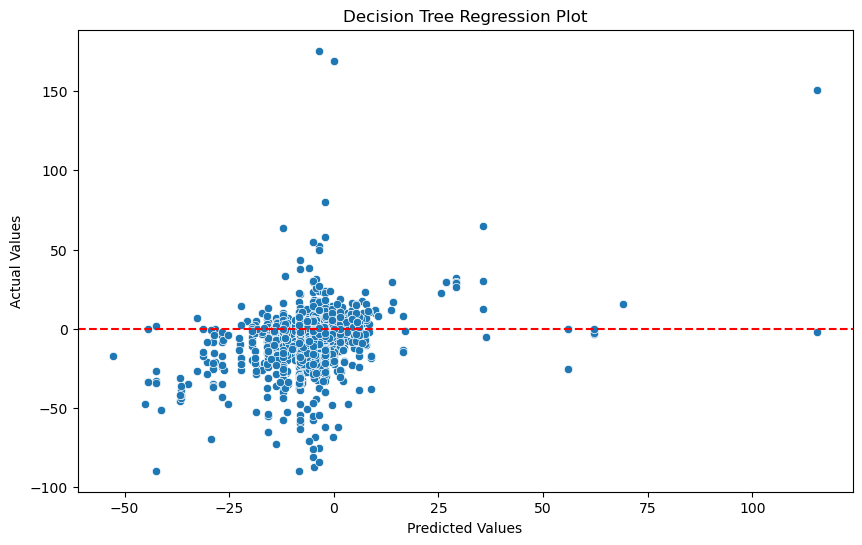

In [177]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y_dtr_best, y_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Decision Tree Regression Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
results = pd.DataFrame(y_test)
results['predicted'] = y_dtr_best
results.describe()

In [180]:
# Define the model
rfr = RandomForestRegressor()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit the data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Evaluate on test data
test_score = best_model.score(X_test, y_test)
print("Test R^2 Score:", test_score)

y_rfr_best = best_model.predict(X_test)

mae = sklearn.metrics.mean_absolute_error(y_test, y_rfr_best)
mse = sklearn.metrics.mean_squared_error(y_test, y_rfr_best)
rmse = np.sqrt(mse)
r2 = sklearn.metrics.r2_score(y_test, y_rfr_best)


print(f"KNNR Mean Absolute Error (MAE): {mae:.9f}")
print(f"KNNR Mean Squared Error (MSE): {mse:.9f}")
print(f"KNNR Root Mean Squared Error (RMSE): {rmse:.9f}")
print(f"KNNR R-squared (R2): {r2:.9f}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Best Hyperparameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test R^2 Score: 0.3134148822239097
KNNR Mean Absolute Error (MAE): 6.403053140
KNNR Mean Squared Error (MSE): 141.098468197
KNNR Root Mean Squared Error (RMSE): 11.878487622
KNNR R-squared (R2): 0.313414882


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


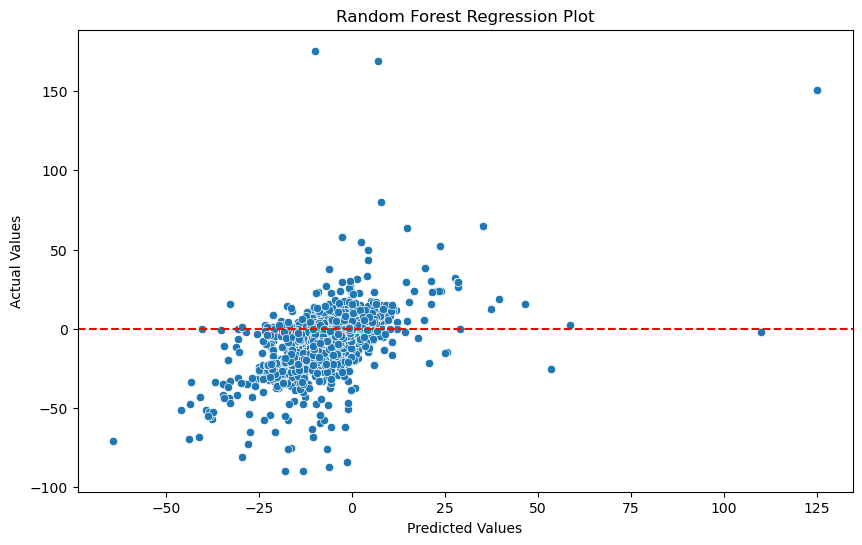

In [182]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y_rfr_best, y_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Random Forest Regression Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [225]:
today_df = qq.insiders()

Drawing from:  https://api.quiverquant.com/beta/live/insiders


In [226]:
today_df = today_df[today_df['Date'] >= '2023-10-09']
today_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2513 entries, 0 to 3433
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ticker                2473 non-null   object 
 1   Date                  2513 non-null   object 
 2   Name                  2513 non-null   object 
 3   AcquiredDisposedCode  2513 non-null   object 
 4   TransactionCode       2513 non-null   object 
 5   Shares                2513 non-null   float64
 6   PricePerShare         2273 non-null   float64
 7   SharesOwnedFollowing  2512 non-null   float64
 8   fileDate              2513 non-null   object 
dtypes: float64(3), object(6)
memory usage: 196.3+ KB


In [248]:
today_df['TotalCost'] = today_df['PricePerShare'] * today_df['Shares']

In [ ]:
today_df = today_df[today_df['AcquiredDisposedCode'] == 'A'].sort_values('TotalCost', ascending=False)
today_df

In [250]:
today_df.head(20)

,Ticker,Date,Name,AcquiredDisposedCode,TransactionCode,Shares,PricePerShare,SharesOwnedFollowing,fileDate,TotalCost
1556,SCU,2023-10-12T00:00:00.000,Rithm Capital Corp.,A,X,4338015.000,7.9500,4.338015e+06,2023-10-13T21:30:14.000,3.448722e+07
2271,None,2023-10-11T00:00:00.000,MS Credit Partners Holdings Inc.,A,P,1313018.327,20.6200,9.727311e+06,2023-10-12T00:52:17.000,2.707444e+07
448,CERE,2023-10-16T00:00:00.000,PERCEPTIVE ADVISORS LLC,A,P,876808.000,22.8100,1.079488e+07,2023-10-17T20:53:58.000,1.999999e+07
883,SRRK,2023-10-12T00:00:00.000,"Invus Public Equities, L.P.",A,P,2189781.000,6.8500,1.124929e+07,2023-10-17T12:36:28.000,1.500000e+07
2183,BIGZ,2023-10-10T00:00:00.000,"Saba Capital Management, L.P.",A,P,913374.000,7.1000,2.584901e+07,2023-10-12T18:17:38.000,6.484955e+06
294,TNGX,2023-10-13T00:00:00.000,"Boxer Capital, LLC",A,P,750000.000,7.0700,7.698642e+06,2023-10-17T22:04:34.000,5.302500e+06
2876,DOCU,2023-10-09T00:00:00.000,Springer Daniel D.,A,M,289667.000,18.0200,1.341086e+06,2023-10-10T23:33:31.000,5.219799e+06
2530,DOCU,2023-10-10T00:00:00.000,Springer Daniel D.,A,M,289666.000,18.0200,1.341085e+06,2023-10-11T20:39:03.000,5.219781e+06
1188,SMMT,2023-10-13T00:00:00.000,Soni Manmeet Singh,A,P,2976190.000,1.6800,2.976190e+06,2023-10-16T20:06:32.000,4.999999e+06
2213,CUK,2023-10-10T00:00:00.000,WEISENBURGER RANDALL J,A,P,350000.000,12.9851,9.612380e+05,2023-10-12T15:35:31.000,4.544785e+06


In [240]:
today_df.to_csv('BullishInsiders10-9.csv')

In [227]:
tdf = today_df.drop(['fileDate', 'SharesOwnedFollowing'], axis=1)
group_cols = tdf.columns[tdf.columns != 'Shares'].tolist()
tdf = tdf.groupby(group_cols)['Shares'].sum().reset_index()
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ticker                1986 non-null   object 
 1   Date                  1986 non-null   object 
 2   Name                  1986 non-null   object 
 3   AcquiredDisposedCode  1986 non-null   object 
 4   TransactionCode       1986 non-null   object 
 5   PricePerShare         1986 non-null   float64
 6   Shares                1986 non-null   float64
dtypes: float64(2), object(5)
memory usage: 108.7+ KB


In [228]:
tdf_model = tdf.drop(['Name'], axis=1)
tdf_model['Date'] = pd.to_datetime(tdf['Date'])
tdf_model['Date'] = (pd.to_datetime('2023-10-18') - tdf_model['Date']).dt.days - 30
tdf_model.head(10)

,Ticker,Date,AcquiredDisposedCode,TransactionCode,PricePerShare,Shares
0,AAPL,-21,D,S,178.5500,19000.0
1,AAPL,-21,D,S,178.9100,12685.0
2,AAPL,-27,D,F,178.8500,5272.0
3,ABCP,-21,D,S,0.1500,50000.0
4,ABEO,-28,D,F,4.1400,181.0
5,ABL,-25,D,S,0.0000,700500.0
6,ABL,-25,D,S,0.0000,700500.0
7,ABL,-25,D,S,0.0000,700500.0
8,ABL,-25,D,S,0.0000,700500.0
9,ABM,-25,D,S,43.9996,6341.0


In [229]:
oh = OneHotEncoder(sparse=False)
enc_src = oh.fit_transform(tdf_model[['TransactionCode']])
enc_df = pd.DataFrame(enc_src, columns=oh.get_feature_names_out(['TransactionCode']))
tdf_model = pd.concat([tdf_model, enc_df], axis=1)
enc_src = oh.fit_transform(tdf_model[['AcquiredDisposedCode']])
enc_df = pd.DataFrame(enc_src, columns=oh.get_feature_names_out(['AcquiredDisposedCode']))
tdf_model = pd.concat([tdf_model, enc_df], axis=1)
tdf_model.head()

,Ticker,Date,AcquiredDisposedCode,TransactionCode,PricePerShare,Shares,TransactionCode_A,TransactionCode_C,TransactionCode_D,TransactionCode_F,...,TransactionCode_J,TransactionCode_L,TransactionCode_M,TransactionCode_P,TransactionCode_S,TransactionCode_U,TransactionCode_W,TransactionCode_X,AcquiredDisposedCode_A,AcquiredDisposedCode_D
0,AAPL,-21,D,S,178.55,19000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,AAPL,-21,D,S,178.91,12685.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,AAPL,-27,D,F,178.85,5272.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,ABCP,-21,D,S,0.15,50000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,ABEO,-28,D,F,4.14,181.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [230]:
tdf_model = tdf_model.drop(['TransactionCode', 'AcquiredDisposedCode'], axis=1)
tdf_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ticker                  1986 non-null   object 
 1   Date                    1986 non-null   int64  
 2   PricePerShare           1986 non-null   float64
 3   Shares                  1986 non-null   float64
 4   TransactionCode_A       1986 non-null   float64
 5   TransactionCode_C       1986 non-null   float64
 6   TransactionCode_D       1986 non-null   float64
 7   TransactionCode_F       1986 non-null   float64
 8   TransactionCode_G       1986 non-null   float64
 9   TransactionCode_J       1986 non-null   float64
 10  TransactionCode_L       1986 non-null   float64
 11  TransactionCode_M       1986 non-null   float64
 12  TransactionCode_P       1986 non-null   float64
 13  TransactionCode_S       1986 non-null   float64
 14  TransactionCode_U       1986 non-null   

In [199]:
ticks = tdf_model['Ticker']

In [236]:
tdf_model['TransactionCode_I'] = 0.0
tdf_model['TransactionCode_O'] = 0.0
#tdf_model['TransactionCode_W'] = 0.0
#tdf_model['TransactionCode_X'] = 0.0
#tdf_model['Date'] = tdf_model['Date'] - 21
tdf_model.head()
bullish = tdf_model[tdf_model['AcquiredDisposedCode_A'] == 1]
bullish['Date'] = bullish['Date'] + 20

/var/folders/7k/6nbtrgkx3g56v2743d5zs9q00000gn/T/ipykernel_61723/3033751588.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bullish['Date'] = bullish['Date'] + 20


In [237]:
bullish.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 16 to 1985
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ticker                  900 non-null    object 
 1   Date                    900 non-null    int64  
 2   PricePerShare           900 non-null    float64
 3   Shares                  900 non-null    float64
 4   TransactionCode_A       900 non-null    float64
 5   TransactionCode_C       900 non-null    float64
 6   TransactionCode_D       900 non-null    float64
 7   TransactionCode_F       900 non-null    float64
 8   TransactionCode_G       900 non-null    float64
 9   TransactionCode_J       900 non-null    float64
 10  TransactionCode_L       900 non-null    float64
 11  TransactionCode_M       900 non-null    float64
 12  TransactionCode_P       900 non-null    float64
 13  TransactionCode_S       900 non-null    float64
 14  TransactionCode_U       900 non-null    

In [244]:
ticks = tdf_model['Ticker']
x1 = tdf_model.drop(['Ticker', 'TransactionCode_U'], axis=1)

y1 = best_model.predict(x1)

predictions = pd.DataFrame(ticks)
predictions['Prediction'] = y1

predictions

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,Ticker,Prediction
0,AAPL,-14.712822
1,AAPL,-14.712822
2,AAPL,-14.849863
3,ABCP,-14.120968
4,ABEO,-14.849863
...,...,...
1981,ZUO,-14.712822
1982,ZUO,-14.712822
1983,ZVIA,-14.712822
1984,ZYXI,-14.849863


In [246]:
y1.min()

-18.011733263957904

In [247]:
predictions.to_csv('10-9-Bull-Insiders.csv')

In [185]:
w = df_model.drop('movement_since_trade', axis=1)
v = df_model['movement_since_trade']

w_train, w_test, v_train, v_test = sklearn.model_selection.train_test_split(w, v, test_size=0.20)

dtr = sklearn.tree.DecisionTreeRegressor()
knnr = sklearn.neighbors.KNeighborsRegressor()
svr = sklearn.svm.SVR(kernel='rbf')

svr.fit(w_train, v_train)

v_pred = svr.predict(w_test)

#fig, ax = plt.subplots() 

mae = sklearn.metrics.mean_absolute_error(v_test, v_pred)

mae = sklearn.metrics.mean_absolute_error(v_test, v_pred)
mse = sklearn.metrics.mean_squared_error(v_test, v_pred)
#rmse = np.sqrt(mse)
r2 = sklearn.metrics.r2_score(v_test, v_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
#print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 8.93
Mean Squared Error (MSE): 215.99
R-squared (R2): -0.01


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(v_test, v_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Random Forest Regression Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [85]:
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

#fig, ax = plt.subplots() 

mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)

mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
r2 = sklearn.metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
#print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
R-squared (R2): -0.18


In [80]:
df_model.to_csv('insiders_normalized_encoded.csv')

In [30]:
dfc = df.drop(['fileDate', 'SharesOwnedFollowing'], axis=1)
group_cols = dfc.columns[dfc.columns != 'Shares'].tolist()
sum_df = dfc.groupby(group_cols, as_index=False).Shares.sum()
print(sum_df.tail())
fr_df = sum_df.groupby(group_cols).size().reset_index(name='Transactions')
fr_df['TotalShares'] = fr_df['Shares'].tolist()
dfc.tail(50)

      Ticker                     Date                  Name  \
15804   oxbr  2023-09-11T00:00:00.000       MARTIN ALLAN S.   
15805   oxbr  2023-09-12T00:00:00.000       MARTIN ALLAN S.   
15806   vine  2023-09-06T00:00:00.000            CSS LLC/IL   
15807   vplm  2023-09-11T00:00:00.000  WILLIAMS KEVIN BRYAN   
15808    xpl  2023-09-27T00:00:00.000            Atzmon Gil   

      AcquiredDisposedCode TransactionCode  PricePerShare    Shares  
15804                    A               P         1.1100   23383.0  
15805                    A               P         1.4900   69582.0  
15806                    D               S         0.5033   30000.0  
15807                    D               S         0.0240  250000.0  
15808                    A               X         0.3100  125000.0  


KeyError: 'Shares'

In [20]:
dfc.sort_values('Transactions', ascending=False)
dfc.head(10)

,Ticker,Date,Name,AcquiredDisposedCode,TransactionCode,PricePerShare,Transactions,TotalShares
0,(SIRI),2023-09-18T00:00:00.000,BARRY THOMAS D,D,F,3.99,1,35755.000
1,1314152,2023-09-25T00:00:00.000,Day R. Martel,A,J,13.14,1,358.694
2,1314152,2023-09-25T00:00:00.000,FISCHER TAMARA D,A,J,13.14,1,56.483
3,1314152,2023-09-25T00:00:00.000,Gordon Jacques,A,J,13.14,1,30.186
4,1314152,2023-09-25T00:00:00.000,LINDGREN DOUGLAS A,A,J,13.14,1,107.529
5,1314152,2023-09-25T00:00:00.000,Swaringen C. Allan,A,J,13.14,1,28.409
6,1314152,2023-09-25T00:00:00.000,THURBER LYNN C,A,J,13.14,1,364.733
7,1314152,2023-09-25T00:00:00.000,Zeigler Robin McBride,A,J,13.14,1,156.371
8,A,2023-09-11T00:00:00.000,Binns Philip,A,A,113.10,1,2203.000
9,A,2023-09-28T00:00:00.000,Gonsalves Rodney,A,P,111.09,1,2.590
